# Bagging

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


#### Label Encoder use krke normal Species columns ko numeric krrha hoo 

In [4]:
from sklearn.preprocessing import LabelEncoder 

In [5]:
encoder = LabelEncoder() 

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,1
7,5.0,3.4,1.5,0.2,0
97,6.2,2.9,4.3,1.3,1


 ### To make this Problem Difficult i am removing some Columns & even in Species am removing setosa column , basically converting it in Binary Classification 

In [8]:
df=df[df['species'] !=0] [['sepal_width','petal_length','species']]

In [9]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [26]:
# !pip install seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'petal_length')

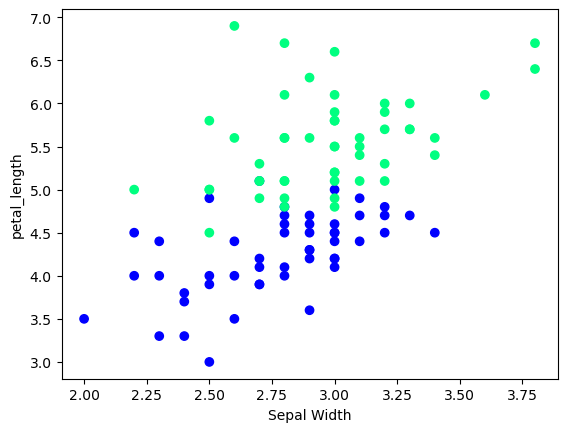

In [11]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')
plt.xlabel("Sepal Width")
plt.ylabel("petal_length")

## Random Sampling

In [12]:
df=df.sample(100)
df_training = df.iloc[:60,:].sample(10)
df_validation = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [13]:
df_validation

,sepal_width,petal_length,species
112,3.0,5.5,2
131,3.8,6.4,2
126,2.8,4.8,2
55,2.8,4.5,1
125,3.2,6.0,2


In [14]:
df_test

,sepal_width,petal_length,species
145,3.0,5.2,2
73,2.8,4.7,1
134,2.6,5.6,2
51,3.2,4.5,1
98,2.5,3.0,1


In [15]:
df_training

,sepal_width,petal_length,species
143,3.2,5.9,2
127,3.0,4.9,2
74,2.9,4.3,1
106,2.5,4.5,2
76,2.8,4.8,1
83,2.7,5.1,1
133,2.8,5.1,2
118,2.6,6.9,2
110,3.2,5.1,2
79,2.6,3.5,1


In [16]:
# x_test =df_validation.iloc[:,0:2]
# Converting it in array 
x_test =df_validation.iloc[:,0:2].values

y_test = df_validation.iloc[:,-1].values

In [17]:
x_test

array([[3. , 5.5],
       [3.8, 6.4],
       [2.8, 4.8],
       [2.8, 4.5],
       [3.2, 6. ]])

In [18]:
y_test

array([2, 2, 2, 1, 2])

## Case 1 Bagging

### Decision Tree Model 1

In [19]:
df_bag = df_training.sample(8,replace=True)  # 10 mai se 8 hie rows lunga , replace = True mtlb 1 hie row multiple time aaskta hai 

In [20]:
df_bag

,sepal_width,petal_length,species
143,3.2,5.9,2
79,2.6,3.5,1
79,2.6,3.5,1
74,2.9,4.3,1
118,2.6,6.9,2
133,2.8,5.1,2
143,3.2,5.9,2
118,2.6,6.9,2


In [21]:
x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [73]:
# !pip install mlxtend

In [22]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [23]:
df_bag1 = DecisionTreeClassifier()

In [82]:
# df_bag1.fit(x,y)

In [83]:
# y_pred=df_bag1.predict(x_test)

In [84]:
# print(accuracy_score(y_test,y_pred))

In [27]:
evaluate(df_bag1,x,y)

1.0


C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Decsion Tree Model 2

In [28]:
df_bag = df_training.sample(8,replace=True) 
x1 = df_bag.iloc[:,0:2]
y1 = df_bag.iloc[:,-1]

In [29]:
df_bag

,sepal_width,petal_length,species
83,2.7,5.1,1
143,3.2,5.9,2
74,2.9,4.3,1
127,3.0,4.9,2
118,2.6,6.9,2
143,3.2,5.9,2
106,2.5,4.5,2
127,3.0,4.9,2


In [30]:
df_bag2 = DecisionTreeClassifier()

In [31]:
evaluate(df_bag2,x1,y1)

0.8


C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Decision Tree Model 3 

In [32]:
df_bag = df_training.sample(8,replace=True) 
x2 = df_bag.iloc[:,0:2]
y2 = df_bag.iloc[:,-1]

In [33]:
df_bag

,sepal_width,petal_length,species
74,2.9,4.3,1
74,2.9,4.3,1
110,3.2,5.1,2
143,3.2,5.9,2
83,2.7,5.1,1
83,2.7,5.1,1
74,2.9,4.3,1
79,2.6,3.5,1


In [34]:
df_bag3 = DecisionTreeClassifier()

In [35]:
evaluate(df_bag3,x2,y2)

0.6


C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
def evaluate(model,x,y):
    model.fit(x,y)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred))
    

##  Aggregation

In [37]:
df_test

,sepal_width,petal_length,species
145,3.0,5.2,2
73,2.8,4.7,1
134,2.6,5.6,2
51,3.2,4.5,1
98,2.5,3.0,1


In [44]:
print("Predictor 1 : ",df_bag1.predict(np.array([3.0,5.2]).reshape(1,2)))  
print("Predictor 2 : ",df_bag2.predict(np.array([3.0,5.2]).reshape(1,2)))  
print("Predictor 2 : ",df_bag3.predict(np.array([3.0,5.2]).reshape(1,2)))  

Predictor 1 :  [2]
Predictor 2 :  [2]
Predictor 2 :  [1]


C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
print("Predictor 1 : ",df_bag1.predict(np.array([3.2,4.5]).reshape(1,2)))  
print("Predictor 2 : ",df_bag2.predict(np.array([3.2,4.5]).reshape(1,2)))  
print("Predictor 3 : ",df_bag3.predict(np.array([3.2,4.5]).reshape(1,2)))  

Predictor 1 :  [1]
Predictor 2 :  [2]
Predictor 3 :  [2]


C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
